## **What is Melanoma Cancer ?**<BR>
Melanoma, also redundantly known as malignant melanoma, is a type of cancer that develops from the pigment-producing cells known as melanocytes. Melanomas typically occur in the skin, but may rarely occur in the mouth, intestines, or eye (uveal melanoma).In women, they most commonly occur on the legs, while in men, they most commonly occur on the back. About 25% of melanomas develop from moles.<BR><BR>
The primary cause of melanoma is ultraviolet light (UV) exposure in those with low levels of the skin pigment melanin.<BR><BR>
Early signs of melanoma are changes to the shape or color of existing moles or, in the case of nodular melanoma, the appearance of a new lump anywhere on the skin.

[Source - Wikipedia]

## **Problem Statement** <BR>
Build a CNN based model which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.



## **Goal** <BR>
To create a multiclass classification model using a custom convolutional neural network in tensorflow

####**Step 1 : Importing all the important libraries**







In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

####**Step 2 : Mount drive and unzip train and test data set**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip "/content/drive/MyDrive/CNN_assignment.zip"


Archive:  /content/drive/MyDrive/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating:

In [5]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test  = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [6]:
#image count for train and validation set
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Train Image Count:",image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Test Image Count",image_count_test)

Train Image Count: 2239
Test Image Count 118


#### **Step 3: Load images using keras.preprocessing**

---




In [7]:
## Let's define some parameters for the loader
batch_size = 32
img_height = 180
img_width = 180

In [8]:
## train data set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
##validation dataset here

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# List out all the classes of skin cancer

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


##### The dataset consists of 2357 images (including train and test set) of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant. <BR>


The data set contains the following diseases: <BR>

* Actinic keratosis
* Basal cell carcinoma
* Dermatofibroma
* Melanoma
* Nevus
* Pigmented benign keratosis
* Seborrheic keratosis
* Squamous cell carcinoma
* Vascular lesion

In [11]:
print(type(train_ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [12]:
for images, labels in train_ds.take(1):
  print(len(images))
  print(len(labels))

32
32


#### **Step 4: Visualize images per class**

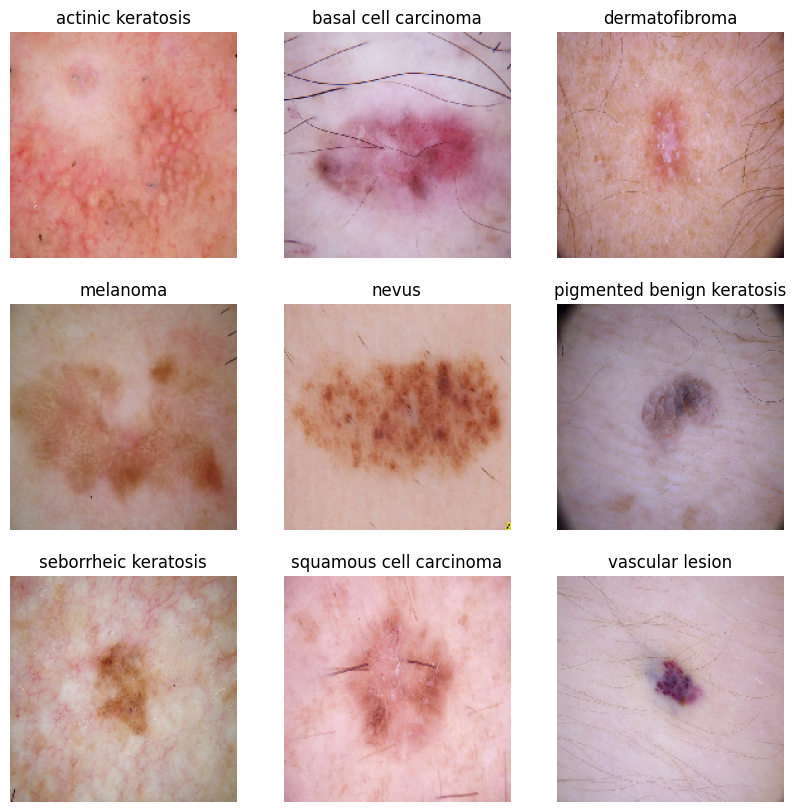

In [13]:
#all the classes of Skin Cancer
#class_names = train_ds.class_names
from tensorflow.keras.preprocessing.image import load_img

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))

#Visualize image
plt.figure(figsize=(10,10))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(c)
    plt.axis("off")

In [14]:
#Check no. of images per class
def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,melanoma,438
1,pigmented benign keratosis,462
2,squamous cell carcinoma,181
3,basal cell carcinoma,376
4,seborrheic keratosis,77
5,dermatofibroma,95
6,nevus,357
7,vascular lesion,139
8,actinic keratosis,114


<Axes: xlabel='No. of Image', ylabel='Class'>

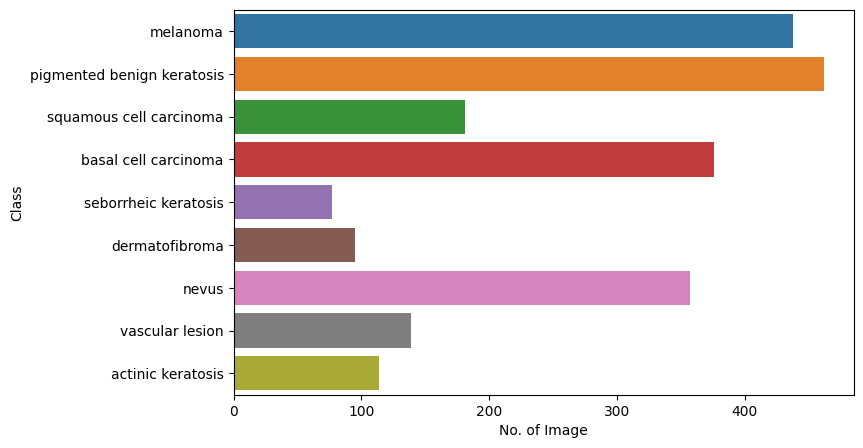

In [15]:
#Distribution of class in bar chart
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

There is a class imbalance. **The class named "pigmented benign keratosis" has highest no. of images whereas the class named "seborrheic keratosis" has lowest no. of images.** <BR><BR>
We will first create a model without doing anything to fix class imbalance issue.

  #### **Step 5: Data Pre-Processing**

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.<BR>
`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.<BR>
`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [16]:
#overlaps data preprocessing and model execution while training., Speed up training
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Step 6: Create a CNN model (without treating class imbalance)**
* ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1).
*  The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [17]:
num_classes = 9

#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  #2D convolution layer (e.g. spatial convolution over images).
  layers.Conv2D(16, 3, padding='same', activation='relu'),

  #We slide over the feature map and extract tiles of a specified size.
  #Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.
  layers.MaxPooling2D(),

  #We slide over the feature map and extract tiles of a specified size.
  layers.Conv2D(32, 3, padding='same', activation='relu'),

  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),

  #We slide over the feature map and extract tiles of a specified size.
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
  layers.MaxPooling2D(),

  #Flattening - Convert into 1D feature vector.  Flattens all its structure to create a single long feature vector
  ##Flattens the input. Does not affect the batch size.
  layers.Flatten(),

  #fully connected layer
  #A hidden layer in which each node is connected to every node in the subsequent hidden layer.
  #A fully connected layer is also known as a dense layer.

  layers.Dense(128, activation='relu'),

  #Dense is the only actual network layer in that model. A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.
  #It's the most basic layer in neural networks. A Dense(10) has ten neurons. A Dense(512) has 512 neurons.
  #Dense implements the operation: output = activation(dot(input, kernel)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
  layers.Dense(num_classes)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])



In [18]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

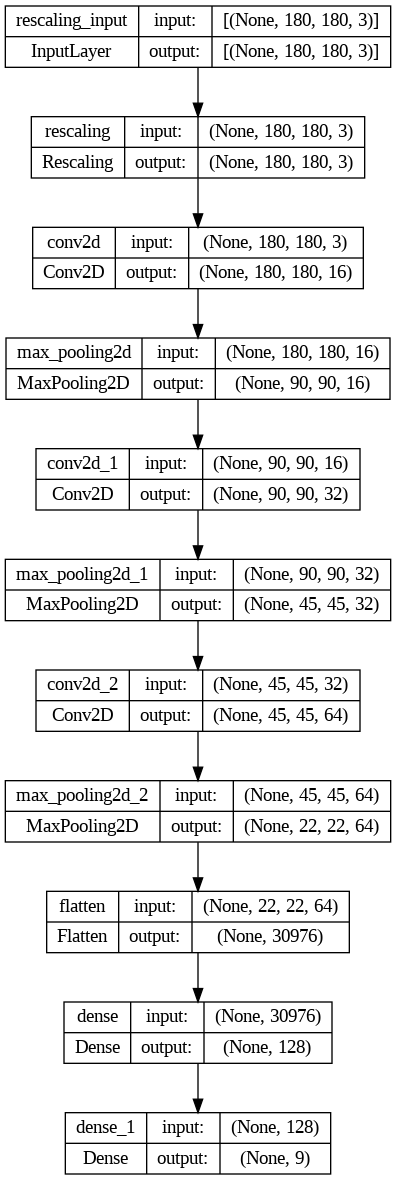

In [19]:
# vizualizing the model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [20]:
### Todo, choose an appropirate optimiser and loss function
#Adam. Adam is a recently proposed update that looks a bit like RMSProp with momentum. The (simplified) update looks as follows:

## #Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [21]:
## Train the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 19s 70ms/step - loss: 2.0405 - accuracy: 0.2478 - val_loss: 1.9967 - val_accuracy: 0.1790
Epoch 2/20
56/56 [==============================] - 1s 20ms/step - loss: 1.6114 - accuracy: 0.4219 - val_loss: 1.4270 - val_accuracy: 0.5257
Epoch 3/20
56/56 [==============================] - 1s 20ms/step - loss: 1.4203 - accuracy: 0.5084 - val_loss: 1.3992 - val_accuracy: 0.5391
Epoch 4/20
56/56 [==============================] - 1s 21ms/step - loss: 1.2888 - accuracy: 0.5530 - val_loss: 1.4329 - val_accuracy: 0.5257
Epoch 5/20
56/56 [==============================] - 1s 20ms/step - loss: 1.2574 - accuracy: 0.5558 - val_loss: 1.4191 - val_accuracy: 0.5213
Epoch 6/20
56/56 [==============================] - 1s 20ms/step - loss: 1.1709 - accuracy: 0.5949 - val_loss: 1.4596 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 1s 22ms/step - loss: 1.1171 - accuracy: 0.6044 - val_loss: 1.4629 - val_accuracy: 0.5414
Epoch 8/20
5

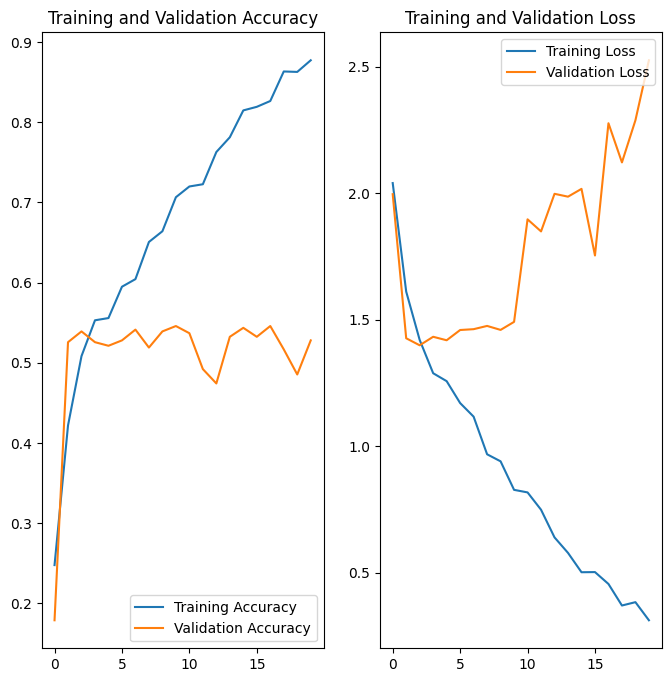

In [22]:
# Visualizing the training results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Findings**
The model is overfitting as training accuracy is around ~90% but validation accuracy is about 56%

1/1 [==============================] - 0s 299ms/step
Actual Class basal cell carcinoma
Predictive Class nevus


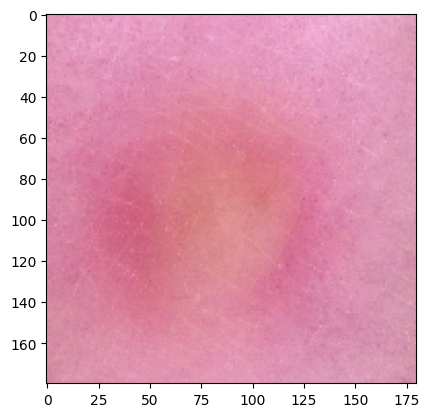

In [23]:
## Test how the model is performing
from glob import glob
Test_image_path = os.path.join(data_dir_test, class_names[2], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[1] +'\n'+ "Predictive Class "+pred_class )

##### So the model is not performing correctly





#### **Step 7: Boost Model Performance with data Augmentation**

As we have seen that the initial model has achieved a very good training accuracy but it seems overfitted. We will see  whether data augmentation can help or not.

In [24]:
# Data augmentation
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomTranslation(1,.5,fill_mode="reflect",interpolation="bilinear",seed=None,fill_value=0.0),
    layers.experimental.preprocessing.RandomCrop(img_height,img_width),
  ]
)

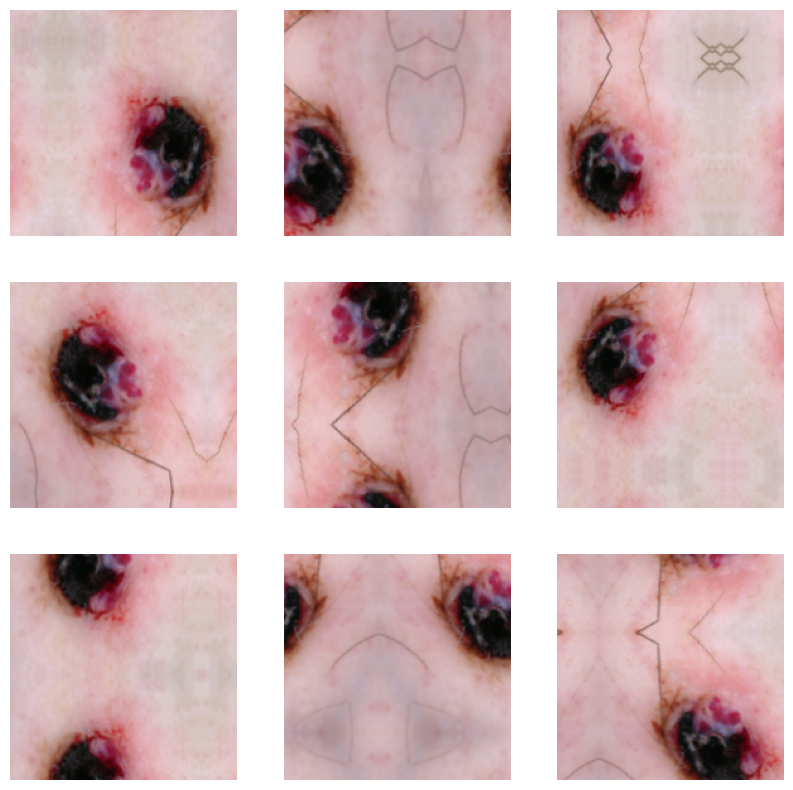

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [25]:
## Model building
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [26]:
## Model Compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 16s 139ms/step - loss: 2.1150 - accuracy: 0.2054 - val_loss: 2.0072 - val_accuracy: 0.2103
Epoch 2/20
56/56 [==============================] - 6s 116ms/step - loss: 1.9007 - accuracy: 0.2773 - val_loss: 1.8403 - val_accuracy: 0.3221
Epoch 3/20
56/56 [==============================] - 7s 119ms/step - loss: 1.7239 - accuracy: 0.3538 - val_loss: 1.9501 - val_accuracy: 0.2416
Epoch 4/20
56/56 [==============================] - 7s 123ms/step - loss: 1.6909 - accuracy: 0.3571 - val_loss: 1.6041 - val_accuracy: 0.4139
Epoch 5/20
56/56 [==============================] - 7s 117ms/step - loss: 1.6969 - accuracy: 0.3588 - val_loss: 1.6280 - val_accuracy: 0.4251
Epoch 6/20
56/56 [==============================] - 6s 116ms/step - loss: 1.6596 - accuracy: 0.3917 - val_loss: 1.6893 - val_accuracy: 0.3826
Epoch 7/20
56/56 [==============================] - 6s 114ms/step - loss: 1.6744 - accuracy: 0.3694 - val_loss: 1.5958 - val_accuracy: 0.3691
Epoch

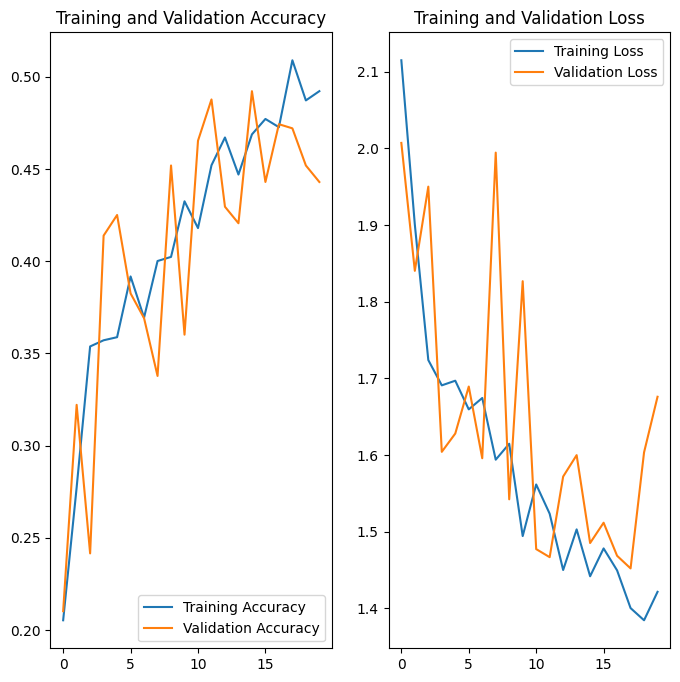

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Findings** <BR>
The correlation between train and test accuracy improved but accuracy value degraded

#### **Step 8: Boost Model Performance using Augmentor:**

In [29]:
!pip install Augmentor

In [30]:
## 1. Instantiate a Pipeline object pointing to a directory containing your initial image data set.
## 2. Define a number of operations to perform on this data set using your Pipeline object.
## 3. Execute these operations by calling the Pipeline’s sample() method.

import Augmentor
path_to_training_dataset = "Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7B345E15E230>: 100%|██████████| 500/500 [00:18<00:00, 26.82 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B34E06F7AC0>: 100%|██████████| 500/500 [00:21<00:00, 23.20 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B345E11ED40>: 100%|██████████| 500/500 [00:19<00:00, 25.03 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7B34DC6CA260>: 100%|██████████| 500/500 [01:29<00:00,  5.61 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B345E11F250>: 100%|██████████| 500/500 [01:16<00:00,  6.53 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B345E4F86D0>: 100%|██████████| 500/500 [00:15<00:00, 31.58 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7B345E24B1F0>: 100%|██████████| 500/500 [00:37<00:00, 13.47 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B34DC684D60>: 100%|██████████| 500/500 [00:16<00:00, 30.64 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7B345E2DE230>: 100%|██████████| 500/500 [00:17<00:00, 29.11 Samples/s]


In [31]:
#Count total number of image generated by Augmentor.
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [32]:
# Distribution of Augmented data after adding new images to the original images
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010289.jpg_2e02ebd3-56aa-4a5c-afc5-d3f241f587d9.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010410.jpg_d8d36a1b-9420-44ba-b125-e1b56b8748b7.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0001124.jpg_5e3e6c51-cd49-4145-ae62-bf849e8715d1.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010441.jpg_e807e7e4-9ee2-472c-8b03-bd7ee3edd32e.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010759.jpg_40322fec-900c-4dac-9820-db6f096c71a5.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000410.jpg_129cc6cb-2d66-4bbb-aad5-d7bd06425b95.jpg',
 'Skin cancer IS

In [33]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [34]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [35]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','No. of Image'])
df2['No. of Image'].value_counts()

melanoma                      500
pigmented benign keratosis    500
squamous cell carcinoma       500
basal cell carcinoma          500
seborrheic keratosis          500
dermatofibroma                500
nevus                         500
vascular lesion               500
actinic keratosis             500
Name: No. of Image, dtype: int64

#### So, now we have added 500 images to all the classes to maintain some class balance.

In [36]:
# create train data set based on original impage + augmented image
## train data set
train_ds_aug = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [37]:
##validation dataset here

val_ds_aug = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [38]:
## Model building
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [41]:
## Compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
## Your code goes here, note: train your model for 20 epochs
epochs = 30
history = model.fit(
  train_ds_aug ,
  validation_data=val_ds_aug,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 35s 191ms/step - loss: 2.0972 - accuracy: 0.2112 - val_loss: 1.7186 - val_accuracy: 0.3482
Epoch 2/30
169/169 [==============================] - 33s 186ms/step - loss: 1.5653 - accuracy: 0.4128 - val_loss: 1.4357 - val_accuracy: 0.4647
Epoch 3/30
169/169 [==============================] - 32s 185ms/step - loss: 1.3692 - accuracy: 0.4837 - val_loss: 1.2527 - val_accuracy: 0.5479
Epoch 4/30
169/169 [==============================] - 32s 183ms/step - loss: 1.2264 - accuracy: 0.5419 - val_loss: 1.1562 - val_accuracy: 0.5650
Epoch 5/30
169/169 [==============================] - 32s 183ms/step - loss: 1.0787 - accuracy: 0.6092 - val_loss: 1.1721 - val_accuracy: 0.5902
Epoch 6/30
169/169 [==============================] - 32s 184ms/step - loss: 0.9463 - accuracy: 0.6584 - val_loss: 0.9937 - val_accuracy: 0.6518
Epoch 7/30
169/169 [==============================] - 32s 183ms/step - loss: 0.8439 - accuracy: 0.7014 - val_loss: 0.9966 - val_ac

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 256)      

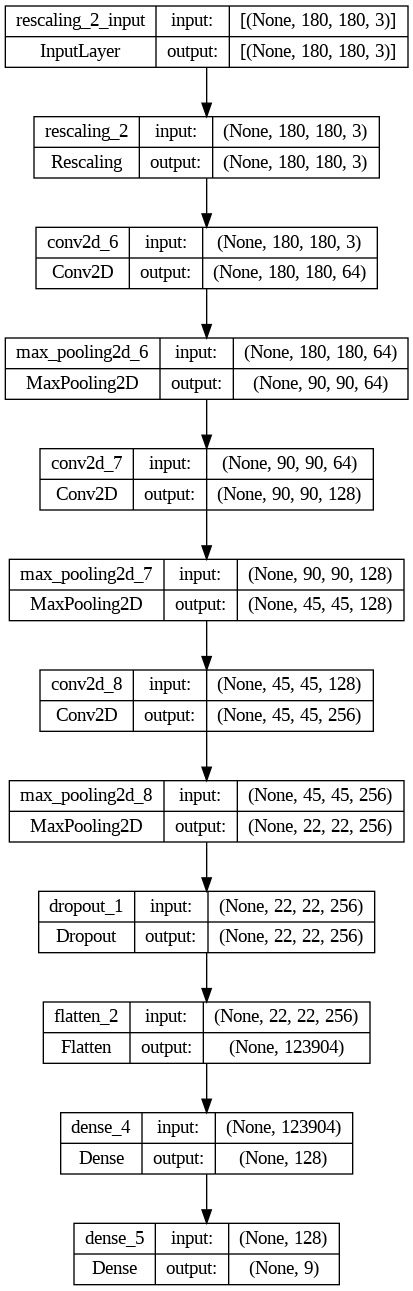

In [44]:
# vizualizing the model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Visualizing the results

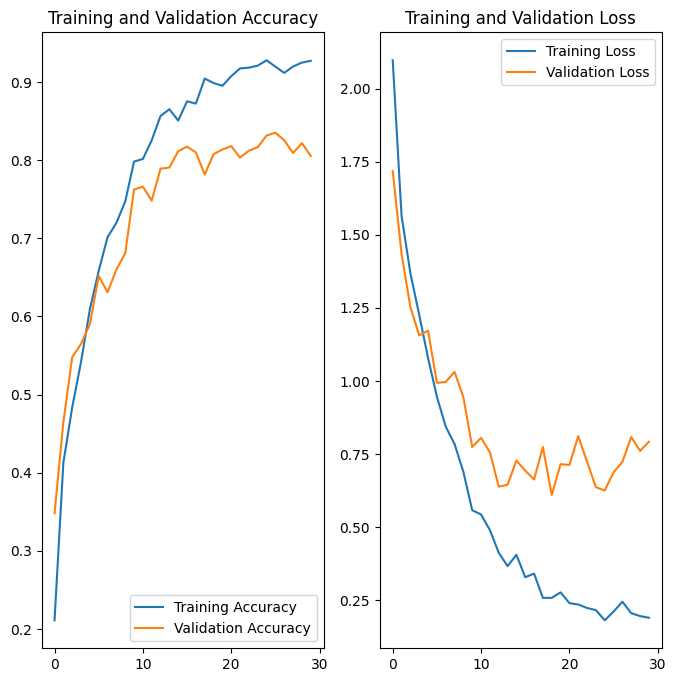

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 483ms/step
Actual Class basal cell carcinoma
Predictive Class basal cell carcinoma


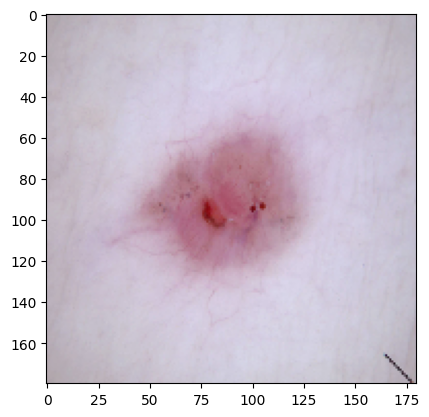

In [46]:
from glob import glob
Test_image_path = os.path.join(data_dir_test, class_names[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[1] +'\n'+ "Predictive Class "+pred_class )

#### **Step 9: Summary**


*   Accuracy on training data has increased by using Augmentor library
*   Model is still overfitting inspite of using Augmentor library
*   The overfitting issue can be resolved by tuning hyperparameter, using different network topolgy, trying dropout layer etc.



